In [73]:
# import everything we need
import numpy as np
import matplotlib.pyplot as plt
from lofarSun.lofarData import LofarDataBF, LofarDataCleaned

import sunpy.map
from sunpy.coordinates import frames, sun, get_earth
from astropy.coordinates import SkyCoord

from sunpy.coordinates.wcs_utils import solar_wcs_frame_mapping,solar_frame_to_wcs_mapping

from pprint import pprint

In [112]:
lofar_cleaned = LofarDataCleaned()
lofar_cleaned.load_fits('SB058-t0032-image.fits')

smap = sunpy.map.Map("SB058-t0032-image.fits")
#smap.meta['']

obs_coord = SkyCoord(smap.reference_coordinate,
    distance=sun.earth_distance(time=lofar_cleaned.header['DATE-OBS']),
    obstime=lofar_cleaned.header['DATE-OBS'],
    frame='icrs',
    equinox='J2000').transform_to(frame='helioprojective', merge_attributes=True)


from sunpy.map import make_fitswcs_header
s_newmap_header=make_fitswcs_header(smap.data, obs_coord)

s_newmap = sunpy.map.Map(smap.data,snewmap_header)
s_newmap.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'HPLN-TAN'  'HPLT-TAN'  
CRVAL : 65.31070937874108  825.2940927704493  
CRPIX : 1025.5  1025.5  
PC1_1 PC1_2  : 1.0  -0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 1.0  1.0  
NAXIS : 0  0

<Distance 1.00264891 AU>

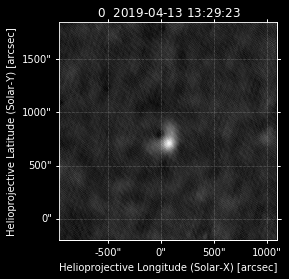

In [110]:
s_newmap.plot()

smap.observer_coordinate
sun.earth_distance(time=lofar_cleaned.header['DATE-OBS'])

In [108]:
print('jaja')

jaja


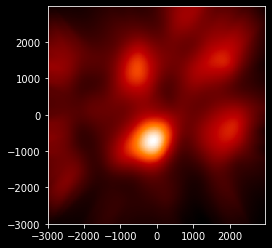

In [3]:
# interpolate X,Y to get a beamform image
[X,Y,data_bf,x,y,Ibeam] = lofar_bf.bf_image_by_idx(30,100)

# plot
plt.imshow(data_bf, cmap='gist_heat',origin='lower',
                 extent=[np.min(X),np.max(X),np.min(Y),np.max(Y)])
plt.show()

{'s0': 65.43724000434034, 'x_cent': -171.49582346710602, 'y_cent': -721.4920517421299, 'tile': 2.325420767575146, 'x_sig': 592.5638058223651, 'y_sig': 474.99511642396857}
{'s0': 2.552679929598186, 'x_cent': 180.7383260074285, 'y_cent': 275.21219676780805, 'tile': 0.022081139397659447, 'x_sig': 915.2896965231499, 'y_sig': 792.6006649079086}


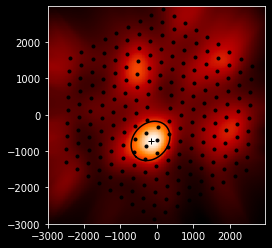

In [4]:
bf_res,bf_err = lofar_bf.bf_fit_gauss_source_by_idx(30,100)
print(bf_res)
print(bf_err)

In [5]:
# write the bfcube into fits:
lofar_bf.write_fits_full('.','test2.fits')

Data shape:
(58, 800, 215)


127.64704320855493


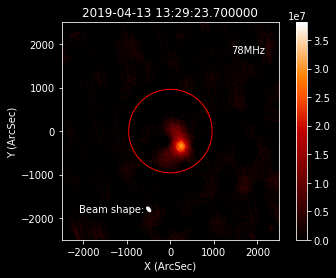

In [118]:
# process interferometry data
lofar_cleaned = LofarDataCleaned()
lofar_cleaned.load_fits('SB058-t0032-image.fits')
lofar_cleaned.plot_image()

In [ ]:
lofar_cleaned.data_xy = lofar_cleaned.sun_coord_trasform(lofar_cleaned.data,lofar_cleaned.header,True,True)

In [7]:
# show information
lofar_cleaned.header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    4 / number of data axes                            
NAXIS1  =                 2048 / length of data axis 1                          
NAXIS2  =                 2048 / length of data axis 2                          
NAXIS3  =                    1 / length of data axis 3                          
NAXIS4  =                    1 / length of data axis 4                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BSCALE  =                   1.                                                  
BZERO   =                   0.                                                  
BUNIT   = 'JY/BEAM '        

-37.06478569554818


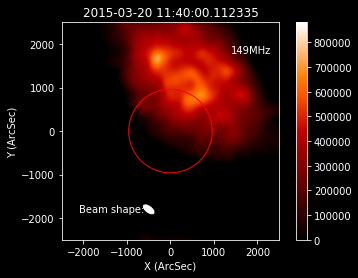

In [57]:
lofar_cleaned = LofarDataCleaned()
lofar_cleaned.load_fits('E:\\nextcloud\\meeting\\meetings\\LOFAR_summer\\solarPipe\\data\\114000_130-220_dirty.b0.image.fits')
lofar_cleaned.plot_image()

In [116]:

smap = sunpy.map.Map('E:\\nextcloud\\meeting\\meetings\\LOFAR_summer\\solarPipe\\data\\114000_130-220_dirty.b0.image.fits')
#smap.meta['']

header = sunpy.io.fits.get_header('E:\\nextcloud\\meeting\\meetings\\LOFAR_summer\\solarPipe\\data\\114000_130-220_dirty.b0.image.fits')

obs_coord = SkyCoord(smap.reference_coordinate,
    distance=sun.earth_distance(time=header['DATE-OBS']),
    obstime=header['DATE-OBS'],
    frame='icrs',
    equinox='J2000').transform_to(frame='helioprojective', merge_attributes=True)


from sunpy.map import make_fitswcs_header
s_newmap_header=make_fitswcs_header(smap.data, obs_coord)

s_newmap = sunpy.map.Map(smap.data,snewmap_header)
s_newmap.plot()

('hgln_obs', 'hglt_obs', 'dsun_obs')
('crln_obs', 'crlt_obs', 'dsun_obs') [sunpy.map.mapbase]


TypeError: list indices must be integers or slices, not str

In [115]:
smap

('hgln_obs', 'hglt_obs', 'dsun_obs')
('crln_obs', 'crlt_obs', 'dsun_obs') [sunpy.map.mapbase]


SunPy Map
---------
Observatory:		 LOFAR
Instrument:		 
Detector:		 
Measurement:		 0.0
Wavelength:		 0.0
Observation Date:	 2015-03-20 11:40:00
Exposure Time:		 0.000000 s
Dimension:		 [18000. 18000.] pix
Coordinate System:	 icrs
Scale:			 [-0.00013889  0.00013889] deg / pix
Reference Pixel:	 [9001. 9001.] pix
Reference Coord:	 [ 3.59633333e+02 -2.67777778e-01] deg
array([[-116.92985 , -116.87993 , -116.82956 , ..., -131.8332  ,
        -131.8446  , -131.85564 ],
       [-116.910645, -116.860794, -116.81053 , ..., -131.81151 ,
        -131.8227  , -131.83353 ],
       [-116.8913  , -116.841545, -116.791374, ..., -131.78957 ,
        -131.80054 , -131.81114 ],
       ...,
       [ -47.06353 ,  -47.06994 ,  -47.076   , ...,  -96.49366 ,
         -96.6027  ,  -96.71161 ],
       [ -47.139423,  -47.145847,  -47.151917, ...,  -96.4612  ,
         -96.570206,  -96.679115],
       [ -47.215153,  -47.221584,  -47.22768 , ...,  -96.42877 ,
         -96.53776 ,  -96.64666 ]], dtype=float32)

In [117]:
header

     = ""2019-05-13T09:25:58 INFO SRCCODE=\'::flagdata\'CLI_COMM: []; MESSAGE: field       = ""2019-05-13T09:25:58 INFO SRCCODE=\'::flagdata\'CLI_COMM: []; MESSAGE: antenna     = ""2019-05-13T09:25:58 INFO SRCCODE=\'::flagdata\'CLI_COMM: []; MESSAGE: uvrange     = ""2019-05-13T09:25:58 INFO SRCCODE=\'::flagdata\'CLI_COMM: []; MESSAGE: timerange   = ""2019-05-13T09:25:58 INFO SRCCODE=\'::flagdata\'CLI_COMM: []; MESSAGE: correlation = ""2019-05-13T09:25:58 INFO SRCCODE=\'::flagdata\'CLI_COMM: []; MESSAGE: scan        = ""2019-05-13T09:25:58 INFO SRCCODE=\'::flagdata\'CLI_COMM: []; MESSAGE: intent      = ""2019-05-13T09:25:58 INFO SRCCODE=\'::flagdata\'CLI_COMM: []; MESSAGE: array       = ""2019-05-13T09:25:58 INFO SRCCODE=\'::flagdata\'CLI_COMM: []; MESSAGE: observation = ""2019-05-13T09:25:58 INFO SRCCODE=\'::flagdata\'CLI_COMM: []; MESSAGE: feed        = ""2019-05-13T09:25:58 INFO SRCCODE=\'::flagdata\'CLI_COMM: []; MESSAGE: clipminmax  = []2019-05-13T09:25:58 INFO SRCCODE=\'::flagdata